In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer_Data.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# checking for any presence of null values

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Replacing all nan values in the minimum payments columns with the mean value of the minimum payment value
df.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.mean(), inplace=True)

df.MINIMUM_PAYMENTS.isnull().sum()

0

In [7]:
# Replacing all the nan values in the credit_limit column with the the mean value of the credit_limit column
df.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.mean(), inplace=True)
df.CREDIT_LIMIT.isnull().sum()

0

In [8]:
# confirming no presence of null values 
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()

0

In [10]:
# Dropping irrelevant columns
df.drop(columns=['CUST_ID'], axis=1, inplace=True)

In [11]:
column_labels = list(df.columns) # extracting all the column labels

In [12]:
df.shape # we have 8950 rows of records and 17 total columns

(8950, 17)

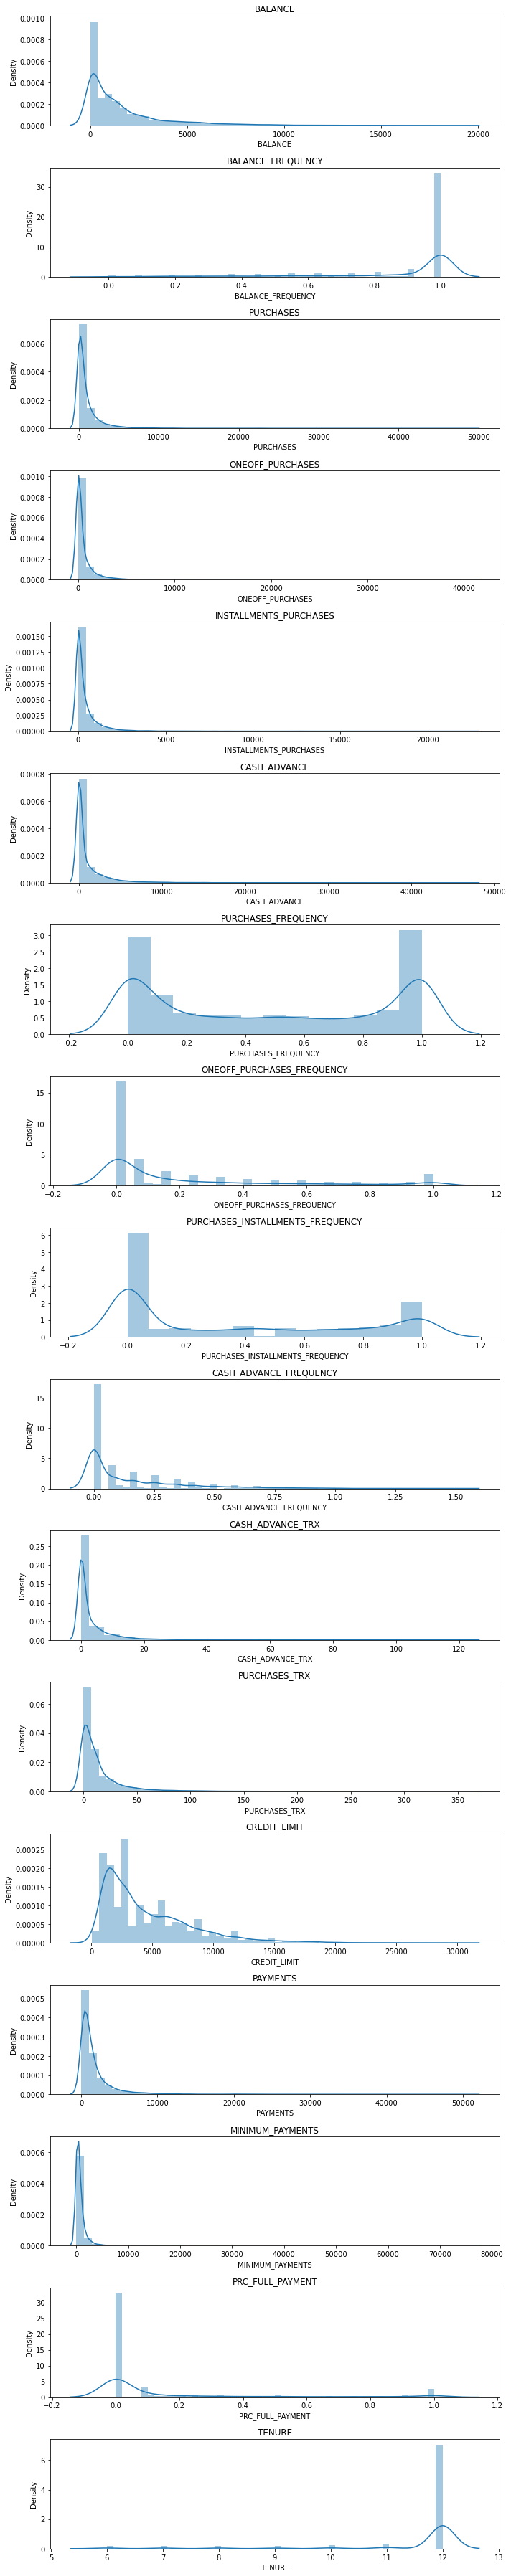

In [13]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde={"color":"b","lw":3,"label":"KDE PLOT"})
    plt.title(df.columns[i])
    
plt.tight_layout()

<AxesSubplot:>

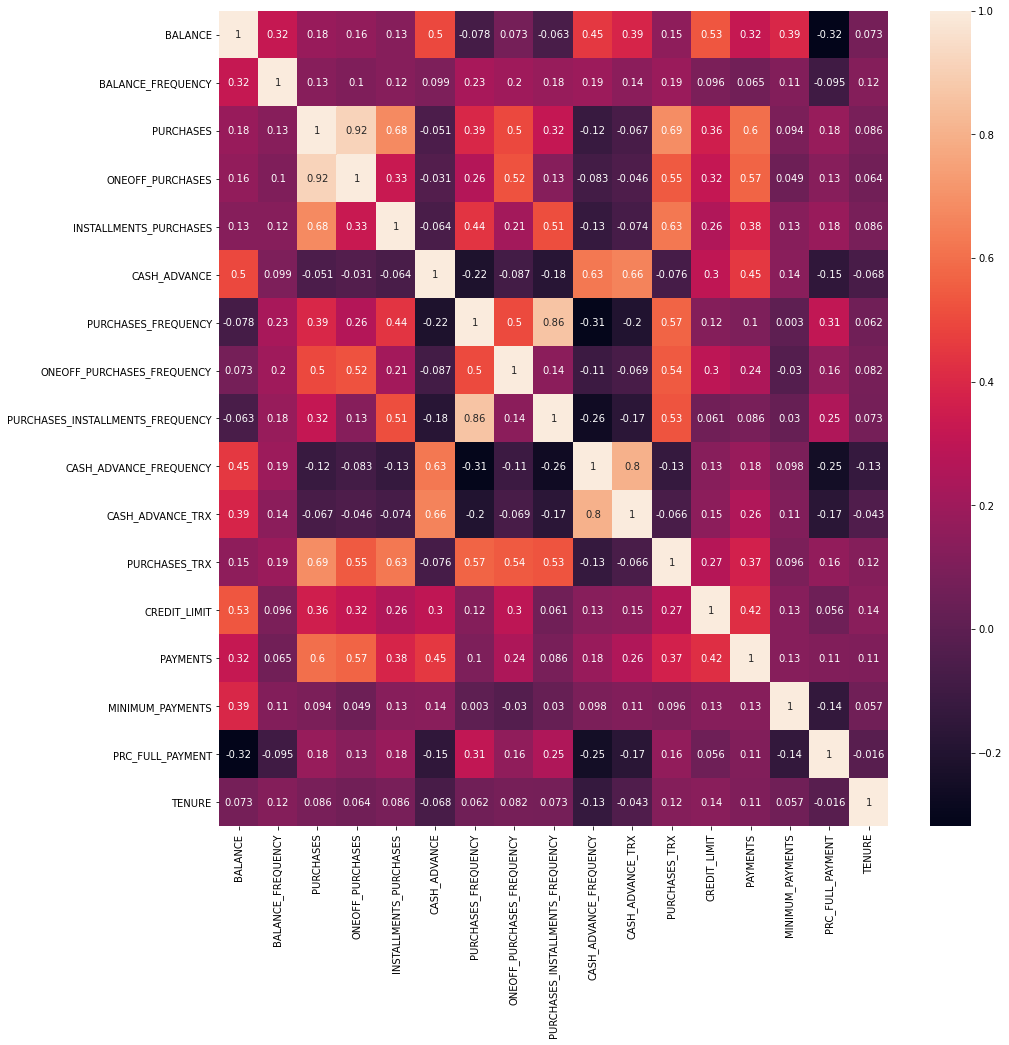

In [14]:
# correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

### KMeans Implementation

Checking for best K Value using the Elbow Method

In [15]:
# standardizing the data
std = StandardScaler()
df_std = std.fit_transform(df)

In [16]:
df_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

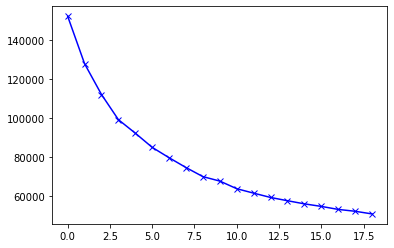

In [17]:
# looking for the best value of K

values = []

range_values = range(1,20)

for i in range_values:
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_std)
    values.append(kmean.inertia_)
    
plt.plot(values, "bx-")

In [18]:
# we would pick 8 as the best K value

kmean = KMeans(7)

In [19]:
kmean.fit(df_std)

label = kmean.labels_

In [20]:
kmean.cluster_centers_.shape

(7, 17)

In [21]:
cluster_centers = pd.DataFrame(data=kmean.cluster_centers_, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.330601,0.360718,0.062810,-0.052417,0.244513,-0.367225,0.987464,0.268748,0.885424,-0.470980,-0.359771,0.258025,-0.112810,-0.157909,-0.085991,0.347681,0.273879
1,-0.344991,-0.335306,-0.280241,-0.207459,-0.281139,0.057798,-0.169394,-0.271368,-0.205324,0.288990,-0.009360,-0.379100,-0.562418,-0.389947,-0.208510,0.026892,-3.177589
2,-0.701695,-2.133926,-0.307022,-0.232746,-0.298245,-0.322274,-0.532036,-0.440274,-0.419380,-0.523294,-0.377810,-0.413767,-0.174280,-0.192495,-0.257509,0.287484,0.202155
3,1.640406,0.397704,-0.215580,-0.150516,-0.233282,1.951971,-0.461165,-0.181481,-0.418996,1.886266,1.878062,-0.259713,1.001875,0.776901,0.542781,-0.395941,0.076403
4,0.007410,0.403025,-0.348933,-0.230260,-0.401786,-0.106906,-0.833593,-0.369257,-0.757236,0.083236,-0.043231,-0.473352,-0.308222,-0.251104,-0.005747,-0.455738,0.272499
5,0.650764,0.464280,1.983536,1.650376,1.657916,-0.220585,1.156638,1.763256,1.033473,-0.331231,-0.237183,2.355827,1.176600,1.092240,0.277190,0.437012,0.309021
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900


In [22]:
cluster_centers = std.inverse_transform(cluster_centers)

cluster_centers= pd.DataFrame(data=cluster_centers, columns=[df.columns])

cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,876.356125,0.962721,1137.399001,505.436086,632.177377,208.782246,0.886667,0.282630,0.716327,0.040896,0.793651,21.123377,4083.999811,1276.013475,663.808669,0.255405,11.883838
1,846.405138,0.797840,404.465878,248.098605,156.837492,1100.076741,0.422365,0.121503,0.282836,0.192974,3.184953,5.286834,2448.141770,604.284418,378.282321,0.161580,7.264890
2,103.956531,0.371763,347.247704,206.126614,141.368012,303.048470,0.276819,0.071115,0.197765,0.030428,0.670549,4.425125,3860.348955,1175.891134,264.092326,0.237799,11.787854
3,4978.841400,0.971483,542.613826,342.611152,200.113185,5072.246199,0.305263,0.148318,0.197918,0.512605,16.065217,8.254348,8139.678854,3982.197243,2129.134523,0.037909,11.619565
4,1579.897610,0.972744,257.703205,210.252497,47.737127,754.683638,0.155789,0.092301,0.063493,0.151801,2.953807,2.944064,3373.012150,1006.221975,850.813046,0.020419,11.881992
5,2918.985990,0.987254,5241.059855,3331.723698,1910.300788,516.294057,0.954565,0.728471,0.775166,0.068861,1.630225,73.266881,8775.401929,4895.072148,1510.185652,0.281533,11.930868
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000


In [23]:
y = kmean.fit_predict(df_std)

In [24]:
y


array([0, 6, 1, ..., 5, 5, 5])

In [25]:
df_clustered = pd.concat([df,pd.DataFrame({'cluster':label})], axis=1)

df_clustered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [26]:
# df_clustered.to_csv('df_clustered.csv', index=False)

In [27]:
# Dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)
df_pca

array([[-1.68222036, -1.07645229],
       [-1.13829419,  2.50647521],
       [ 0.96968526, -0.38353681],
       ...,
       [-0.9262043 , -1.81078482],
       [-2.33655249, -0.65796104],
       [-0.55642162, -0.40046643]])

In [28]:
df_pca = pd.DataFrame(data=df_pca, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138294,2.506475
2,0.969685,-0.383537
3,-0.873627,0.043162
4,-1.599434,-0.688581
...,...,...
8945,-0.359630,-2.016144
8946,-0.564369,-1.639129
8947,-0.926204,-1.810785
8948,-2.336552,-0.657961


In [29]:
clustered_pca = pd.concat([df_pca,pd.DataFrame({"cluster":label})],axis=1)
clustered_pca

,pca1,pca2,cluster
0,-1.682220,-1.076452,4
1,-1.138294,2.506475,3
2,0.969685,-0.383537,0
3,-0.873627,0.043162,4
4,-1.599434,-0.688581,4
...,...,...,...
8945,-0.359630,-2.016144,1
8946,-0.564369,-1.639129,1
8947,-0.926204,-1.810785,1
8948,-2.336552,-0.657961,1


In [93]:
# clustered_pca.to_csv('clustered_pca.csv', index=False)

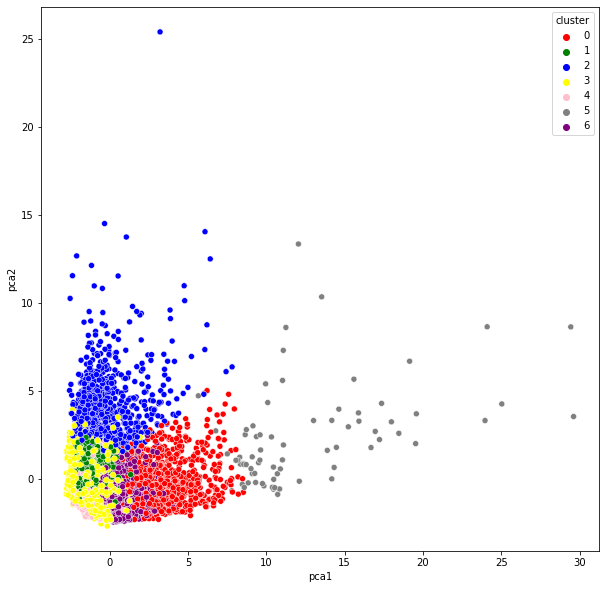

In [89]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=clustered_pca, palette=['red','green','blue','yellow','pink','gray','purple'])
plt.show()

In [91]:
# df.to_csv('data_initial.csv', index=False)

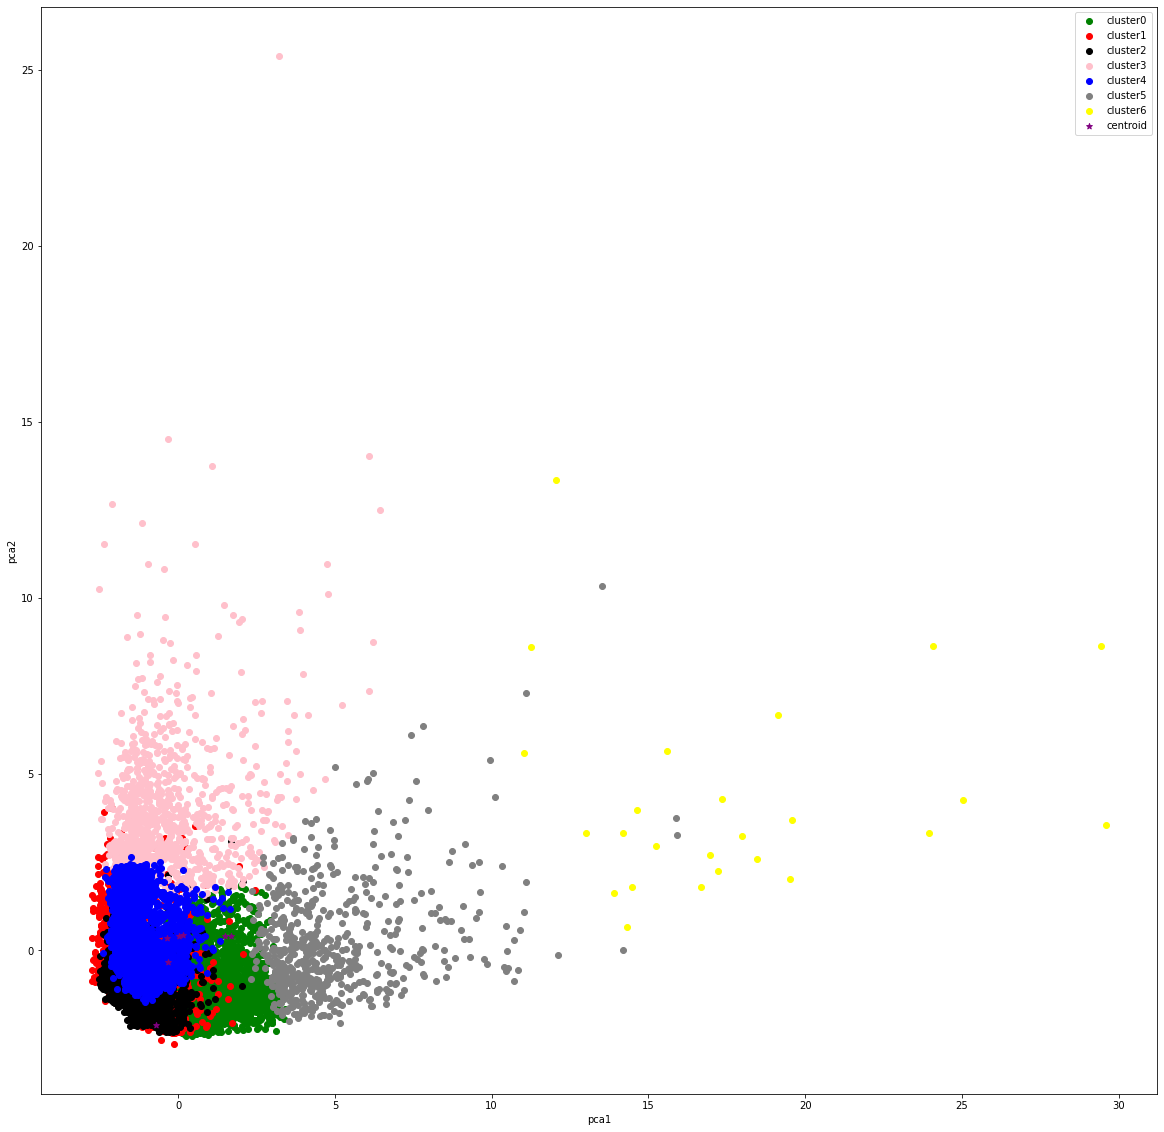

In [32]:
cluster0 = clustered_pca[clustered_pca['cluster']==0]
cluster1 = clustered_pca[clustered_pca['cluster']==1]
cluster2 = clustered_pca[clustered_pca['cluster']==2]
cluster3 = clustered_pca[clustered_pca['cluster']==3]
cluster4 = clustered_pca[clustered_pca['cluster']==4]
cluster5 = clustered_pca[clustered_pca['cluster']==5]
cluster6 = clustered_pca[clustered_pca['cluster']==6]

plt.figure(figsize=(20,20))
plt.scatter(cluster0.pca1,cluster0.pca2, color = 'green',label='cluster0')
plt.scatter(cluster1.pca1,cluster1.pca2, color = 'red',label='cluster1')
plt.scatter(cluster2.pca1,cluster2.pca2, color = 'black',label='cluster2')
plt.scatter(cluster3.pca1,cluster3.pca2, color = 'pink',label='cluster3')
plt.scatter(cluster4.pca1,cluster4.pca2, color = 'blue',label='cluster4')
plt.scatter(cluster5.pca1,cluster5.pca2, color = 'gray',label='cluster5')
plt.scatter(cluster6.pca1,cluster6.pca2, color = 'yellow',label='cluster6')

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1],color='purple', marker='*', label='centroid')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()